# DNA Sequence Analysis

## 1. Introduction

In this project, we use the BioPython library to manipulate and analyse DNA sequence data. DNA, the carrier of genetic information, consists of nucleotides—adenine (A), thymine (T), cytosine (C), and guanine (G). Understanding DNA sequence characteristics is vital across genetic research, disease diagnosis, drug development, and evolutionary studies.

The project involves various analyses, starting with fundamental properties like nucleotide composition and GC content. These provide insights into nucleotide distribution and DNA stability. Advanced analyses include Tri-nucleotide compositions (Tri-mer), protein synthesis simulation, protein analysis, and Codon Usage Analysis.

## 2. BioPython

Biopython is an open-source Python library designed for computational biology and bioinformatics tasks. It provides tools and modules for working with biological data, including DNA and protein sequences, sequence alignments, protein structures, and more. Biopython facilitates various bioinformatics analyses, such as sequence manipulation, parsing and writing sequence file formats, performing sequence alignments, accessing online biological databases, and executing advanced computational biology algorithms. 


## 3. DNA

![Image Alt Text](images/dna.jpeg)

Deoxyribonucleic acid (DNA) is a molecule found in the cells of all living organisms, carrying the genetic instructions necessary for their growth, development, functioning, and reproduction. Structurally, DNA consists of two long chains, or strands, coiled around each other to form a double helix. Each strand is composed of smaller units called **nucleotides**, which contain a sugar-phosphate backbone and one of four nitrogenous bases: 
- adenine (A)
- thymine (T)
- cytosine (C)
- guanine (G)

The sequence of these bases along the DNA strands encodes the genetic information, with specific sequences representing genes responsible for various biological traits and functions. DNA undergoes processes such as replication, **transcription**, and **translation** to propagate genetic information and produce **proteins**, which are essential for the functioning of cells and organisms. Understanding DNA's structure, function, and interactions is fundamental to fields such as genetics, molecular biology, medicine, and biotechnology, enabling advancements in areas ranging from disease diagnosis and treatment to genetic engineering and evolutionary studies.

## 4. Data Analysis

#### Importing Libraries and Modules

In [2]:
import Bio
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio import AlignIO
from Bio.pairwise2 import format_alignment 
from Bio.Align import MultipleSeqAlignment
from Bio.Blast import NCBIWWW
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
import nglview as nv
from colorama import Back, Style, Fore
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np 

In [3]:
import sys
import os

sys.path.append(os.path.abspath('analysis'))
sys.path.append(os.path.abspath('images'))

import dna_analysis as da

### 4.1 DNA Sequence Data

The data used in this analysis originates from the [Protein Data Bank (PDB)](https://www.rcsb.org/structure/6lu7). The dataset consists of the crystal structure of the COVID-19 main protease in complex with an inhibitor N3. This structure provides valuable insights into the molecular interactions between the viral protease and the inhibitor molecule. The genome sequence is represented by a string of nucleotides, including adenine (A), thymine (T), cytosine (C), and guanine (G). 

In [4]:
cov_record = SeqIO.read("data/sequence.fasta", "fasta")
cov_record

SeqRecord(seq=Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG'), id='MW463452.1', name='MW463452.1', description='MW463452.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/TUN/TUN-20212285/2021, complete genome', dbxrefs=[])

#### Sequence Length
The genome sequence length refers to the total number of nucleotides in an organism's entire genome, encompassing all of its DNA. 

In [5]:
sequence_length = len(cov_record.seq)
print("Genome sequence length: ", sequence_length)

Genome sequence length:  29845


### 4.2 Nucleotide Composition
Analyzing nucleotide composition involves counting the occurrences of each nucleotide in a sequence and calculating their respective percentages. 

#### Cleaning the sequence

In [6]:
#Display the sequence
cov_dna = cov_record.seq
cov_dna

Seq('TCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAAC...AGG')

In [7]:
#Count of nucleotide
counts = {'A': 0, 'T': 0, 'G': 0, 'C': 0, 'N': 0, 'Others': 0}
for base in cov_dna:
    if base in counts:
        counts[base] += 1
    else:
        counts['Others'] += 1

print("Counts of each nucleotide:")
print(counts)

Counts of each nucleotide:
{'A': 8899, 'T': 9588, 'G': 5851, 'C': 5480, 'N': 27, 'Others': 0}


#### Observations
The letter 'N' in a nucleotide sequence typically represents an ambiguous base call, indicating that the exact nucleotide at that position is unknown or uncertain. It could result from various reasons such as sequencing errors, incomplete sequencing, or genetic variations within a population. In the context of genomic data, 'N' is often used as a placeholder to denote any nucleotide (A, T, C, or G) when the specific base cannot be determined with certainty.

In [8]:
cleaned_cov_dna = ''.join([base for base in cov_dna if base != 'N'])

In [9]:
print("COVID-19 genome: \n")
da.seq_repr(cleaned_cov_dna[0:180])

COVID-19 genome: 

TCCCAGGTAA CAAACCAACC AACTTTCGAT CTCTTGTAGA TCTGTTCTCT AAACGAACTT
TAAAATCTGT GTGGCTGTCA CTCGGCTGCA TGCTTAGTGC ACTCACGCAG TATAATTAAT
AACTAATTAC TGTCGTTGAC AGGACACGAG TAACTCGTCT ATCTTCTGCA GGCTGCTTAC

#### Finding the Composition of each Nucleotide

In [10]:
ndna = da.nucleotides_composition(cleaned_cov_dna)
ndf = pd.DataFrame.from_dict(ndna, orient ='index')
ndf = ndf.reset_index()
ndf = ndf.rename(columns={"index": "Nucleotide", 0: "Composition"})
ndf

,Nucleotide,Composition
0,A,29.844389
1,C,18.378161
2,G,19.622376
3,T,32.155074


#### Visualising Nucleotide Composition

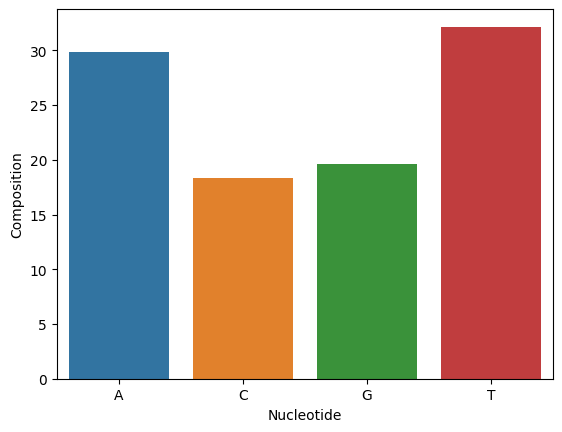

In [11]:
ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf, hue="Nucleotide")

### 4.3 Calculating GC-content of the DNA
The GC content refers to the percentage of nucleotides in a DNA sequence that are either guanine (G) or cytosine (C). It is a crucial metric as it reflects the stability and melting temperature of DNA, which can influence various biological processes such as DNA replication, transcription, and translation.

In [12]:
gc_content = da.calculate_gc_content(cleaned_cov_dna)
print("GC content:", gc_content)

GC content: 38.000536588637736


### 4.4 Tri-nucleotide compositions (Tri-mer)
Tri-nucleotide compositions, often referred to as tri-mers, represent the frequencies of all possible combinations of three nucleotides (A, T, G, and C) within a DNA sequence. 
- **Composition**: Tri-nucleotide composition, or Tri-mer composition, refers to the distribution or abundance of all possible combinations of three consecutive nucleotides (e.g., AAA, AAC, AAG, AAT, ACA, etc.) within a DNA sequence.
- **Total Composition**: Total Tri-mer composition refers to the sum of the abundances of all possible Tri-mers present in the DNA sequence.
- **Normalized Frequency**: Normalized Tri-mer frequency involves dividing the count of each Tri-mer by the total number of Tri-mers in the sequence.

In [13]:
composition, total_composition, norm_freq = da.trimer_composition(cleaned_cov_dna)

In [14]:
print("Trimer Composition:\n")
print(composition)
print("\n\nTotal Composition:\n")
print(total_composition)
print("\n\nNormalised Frequency:\n")
print(norm_freq)

Trimer Composition:

{'AAA': 641, 'AAC': 615, 'AAG': 575, 'AAT': 760, 'ACA': 755, 'ACC': 371, 'ACG': 164, 'ACT': 675, 'AGA': 567, 'AGC': 300, 'AGG': 328, 'ATA': 447, 'ATC': 339, 'ATG': 723, 'CAA': 702, 'CAC': 427, 'CAG': 437, 'CCA': 354, 'CCC': 102, 'CCG': 73, 'CGA': 95, 'CGC': 94, 'CTA': 555, 'CTC': 270, 'GAA': 531, 'GAC': 338, 'GCA': 371, 'GCC': 188, 'GGA': 281, 'GTA': 468, 'TAA': 717, 'TCA': 551}


Total Composition:

13814


Normalised Frequency:

[0.046402200665991024, 0.04452005212103663, 0.041624438974952944, 0.05501664977558998, 0.054654698132329524, 0.02685681192992616, 0.011872013898943101, 0.048863471840162154, 0.04104531634573621, 0.021717098595627624, 0.023744027797886202, 0.03235847690748516, 0.024540321413059216, 0.052338207615462574, 0.05081801071376864, 0.030910670334443318, 0.03163457362096424, 0.025626176342840597, 0.007383813522513392, 0.005284493991602722, 0.006877081221948748, 0.006804690893296656, 0.040176632401911105, 0.019545388736064862, 0.03843926451426089, 0

In [15]:
tri = pd.DataFrame.from_dict(composition, orient ='index')
tri = tri.reset_index()
tri = tri.rename(columns={"index": "trimer", 0: "count"})
tri.sort_values(by='count', ascending=False, inplace=True)
tri.style.bar(subset=["count"],color='#').background_gradient(cmap='Reds')

,trimer,count
3,AAT,760
4,ACA,755
13,ATG,723
30,TAA,717
14,CAA,702
7,ACT,675
0,AAA,641
1,AAC,615
2,AAG,575
8,AGA,567


<Axes: xlabel='count', ylabel='trimer'>

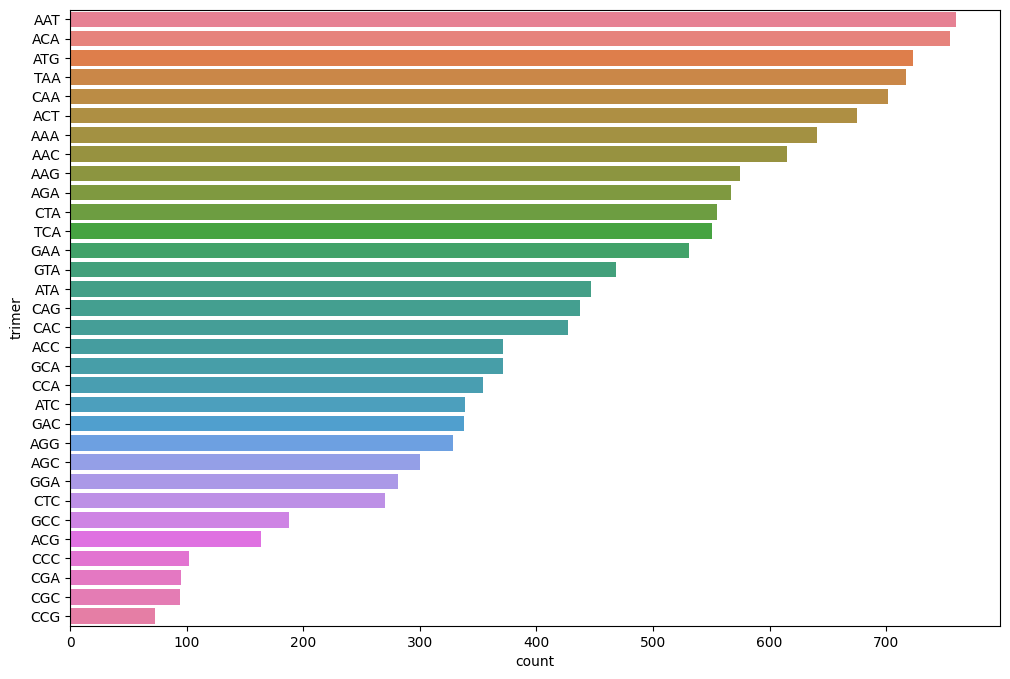

In [16]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="count", y="trimer", ax=ax, data=tri, hue='trimer')

### 4.5 Imitating Protein Synthesis

In the section on imitating protein synthesis, we aim to simulate the process by which DNA sequences are transcribed into mRNA and then translated into protein. This process involves several key steps, including transcription, where DNA is converted into mRNA by RNA polymerase, and translation, where mRNA is decoded by ribosomes to produce a sequence of amino acids, forming a protein.

To simulate this process, we'll first transcribe the DNA sequence into mRNA, considering the complementary base pairing rules (A-U and C-G). Then, we'll translate the mRNA sequence into a sequence of amino acids using the genetic code, where each three-nucleotide codon corresponds to a specific amino acid or a stop signal. 

![Image Alt Text](images/proteinimit.jpeg)

#### Transcription and translation

In [18]:
cov_mrna = cov_dna.transcribe()
cov_protein = cov_mrna.translate()
cov_protein

Seq('SQVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVY...AS*')

#### Finding the Amino Acids from the Protein Structure

In [19]:
cov_aa_list = cov_protein.split("*")
cov_aa_list[0:10]

[Seq('SQVTNQPTFDLL'),
 Seq('ICSLNEL'),
 Seq('NLCGCHSAACLVHSRSIINN'),
 Seq('LLSLTGHE'),
 Seq('LVYLLQAAYGFVRVAADHQHI'),
 Seq('VLSGCDRKVRWRALSLVSTRKHTSNSVCLFYRFATCSYVALETPWRRSYQRHVN...LVA'),
 Seq(''),
 Seq('KLKKASCLNLNSPMCSSNVRMLELHLMVMLWLSW'),
 Seq('QNSKAFSTVVVVRHLVSLSLMWAKYQWLTARFFFVRTVIKELVAIVTAPI'),
 Seq('SHLT')]

#### Cleaning Protein list

In [20]:
#Remove chains smaller than 20 amino acids long
clean_aa_list = [str(aa) for aa in cov_aa_list if len(aa) >= 20]
clean_aa_list[0:10]

['NLCGCHSAACLVHSRSIINN',
 'LVYLLQAAYGFVRVAADHQHI',
 'VLSGCDRKVRWRALSLVSTRKHTSNSVCLFYRFATCSYVALETPWRRSYQRHVNILKMALVA',
 'KLKKASCLNLNSPMCSSNVRMLELHLMVMLWLSW',
 'QNSKAFSTVVVVRHLVSLSLMWAKYQWLTARFFFVRTVIKELVAIVTAPI',
 'ATSLALILMKIFKKTGTLNIAVVLPVNSCVSLTEGHTLAMSITTSVALMATLLSALKTF',
 'HVLVKLHALCPNNWTLLTLRGVYTAAVNMSMKLLGTRNVLKRAMNCRHLLKLNWQRNLTPSMGNVQILYFP',
 'SRLFNQGLKRKSLMALWVEFDLSIQLRHQMNATKCAFQLS',
 'SVIIVVKLHGRRAILLKPLANFVALRI',
 'LKKVPLLVVTYPKMLLLKFIVQHVTIQK']

### 4.6 Protein Analysis

Protein analysis refers to the systematic study of proteins to understand their structure, function, interactions, and properties.

**Molecular Weight**: The molecular weight of a protein is the sum of the atomic weights of all atoms in its molecule. It's a critical parameter as it influences various aspects of protein behavior, including its folding, stability, and interactions with other molecules.

**Aromaticity**: Aromaticity refers to the presence of aromatic amino acids, such as phenylalanine, tyrosine, and tryptophan, in a protein sequence. Aromatic amino acids contribute to the protein's structure and function, often playing key roles in ligand binding, catalysis, and protein-protein interactions.

**Isoelectric Point (pI)**: The isoelectric point (pI) is the pH at which a protein has no net charge. It's a crucial parameter for protein purification and characterization, as proteins tend to be least soluble at their pI. The pI is determined by the distribution of charged amino acids (acidic and basic) in the protein sequence.

We are considering the longest amino acid for analysis.

#### Finding longest amino acid for analysis

In [21]:
pdf = pd.DataFrame({"amino_acids":clean_aa_list})
pdf['count'] = pdf['amino_acids'].str.len()
longest_aa = pdf.nlargest(1, "count")
aa = longest_aa['amino_acids'].iloc[0]
aa

'SSGLNELNIILVFLFGTLILAMADSNGTITVXELKKLLEQWNLVIGFLFLTWICLLQFAYANRNRFLYIIKLIFLWLLWPVTLACFVLAAVYRINWITGGIAIAMACLVGLMWLSYFIASFRLFARTRSMWSFNPETNILLNVPLHGTILTRPLLESELVIGAVILRGHLRIAGHHLGRCDIKDLPKEITVATSRTLSYYKLGASQRVAGDSGFAAYSRYRIGNYKLNTDHSSSSDNIALLVQ'

#### Cleaning amino acid
The "X" character in a protein sequence typically represents an unknown or ambiguous amino acid residue. It could indicate that the specific identity of that residue is uncertain due to experimental limitations, sequencing errors, or other factors.

In [22]:
clean_aa = ''
for i in aa:
    if(i!='X'):
        clean_aa = clean_aa + i

#### Analysis

In [23]:
pa = ProteinAnalysis(clean_aa)

MW = pa.molecular_weight()
print("Molecular weight: ", MW)

A = pa.aromaticity()
print("\nAromaticity: ", A)

I = pa.isoelectric_point()
print("\nIsoelectric point: ", I)

Molecular weight:  27246.84670000003

Aromaticity:  0.11983471074380166

Isoelectric point:  9.509038352966307


### 4.7 Amino Acid Composition
Amino acid composition refers to the distribution and frequency of individual amino acids within a protein sequence. 

In [24]:
ac = da.amino_acid_composition(cov_protein)
amc = pd.DataFrame.from_dict(ac, orient ='index')
amc = amc.reset_index()
amc = amc.rename(columns={"index": "amino_acid", 0: "composition"})
r = amc.sort_values(by='composition', ascending=False)
r.style.bar(subset=["composition"],color='#').background_gradient(cmap='Purples')

,amino_acid,composition
17,L,16.455569
12,S,7.056695
6,V,6.775231
7,T,6.242461
13,I,5.840370
10,K,5.207077
4,C,4.734620
11,R,4.644150
16,F,4.613993
2,Q,4.091275


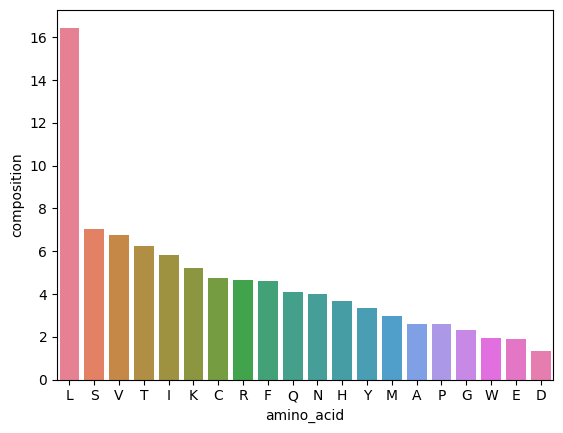

In [25]:
ax = sns.barplot(x="amino_acid", y="composition", data=r, hue="amino_acid")

### 4.8 Open Reading Frame
Finding the Open Reading Frame (ORF) is a crucial step in molecular genetics for identifying segments of DNA that can potentially be translated into proteins. An ORF is a contiguous sequence of nucleotides that begins with a start codon and ends with a stop codon. By identifying ORFs within a DNA sequence, researchers can pinpoint regions with the potential to encode proteins and gain insights into gene structure, function, and regulation. This process is essential for genome annotation, gene prediction, and understanding the genetic basis of various biological processes.

In [26]:
orf = []

for i in cov_protein.split("STOP"):
    for n in range(len(i)-1, -1, -1):
        if i[n] == "M":
            orf.append(i[n:]+"STOP")

orf[0:10]

[Seq('M*LTLISHSNL*SVCNIREDLKEPPHFHRGHAEYDRVYSEQC*GELPIWKSPNV...TOP'),
 Seq('MQTTQGRWAI*TFSLFRLRYIVYSCAE*ILVTT*HN*M*LTLISHSNL*SVCNI...TOP'),
 Seq('MISPNNCNNP*AVLTQLRPKLMQTTQGRWAI*TFSLFRLRYIVYSCAE*ILVTT...TOP'),
 Seq('MKLKPYRRDRRNSKL*LFFLLQIWMISPNNCNNP*AVLTQLRPKLMQTTQGRWA...TOP'),
 Seq('MTKIQISKIKSFC*ISILTHTKHSHQQSLKRTKRRRLMKLKPYRRDRRNSKL*L...TOP'),
 Seq('M*HKLSADVVQNKPKEILGTRN*SDKELITNIGRKLHNLPPALQRSSECRALAW...TOP'),
 Seq('MLLLFCCCLTD*TSLRAKCLVKANNNKAKLSLRNLLLRLLRSLGKNVLPLKHTM...TOP'),
 Seq('MAVMLLLFCCCLTD*TSLRAKCLVKANNNKAKLSLRNLLLRLLRSLGKNVLPLK...TOP'),
 Seq('MLQSCYNFLKEQHCQKASTQKGAEAAVKPLLVPHHVVATVQEIQLQAAVGELLL...TOP'),
 Seq('MVLTKTASYGLQLREP*IHQKITLAPAILLTMLQSCYNFLKEQHCQKASTQKGA...TOP')]

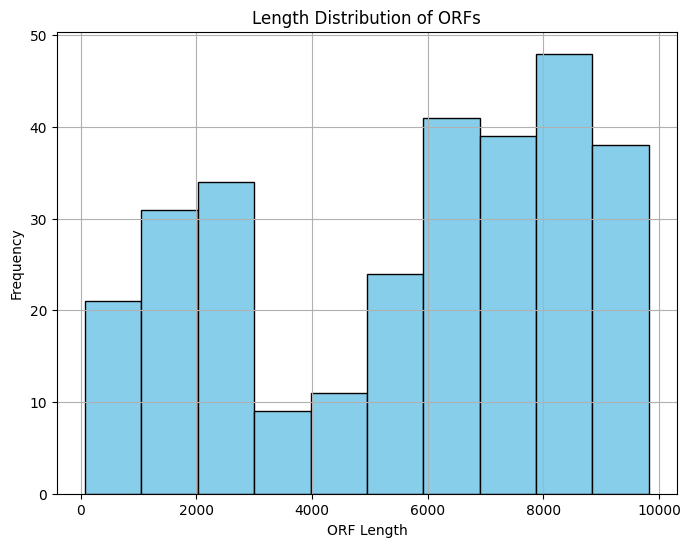

In [27]:
orf_lengths = [len(o) for o in orf]

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(orf_lengths, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('ORF Length')
plt.ylabel('Frequency')
plt.title('Length Distribution of ORFs')
plt.grid(True)
plt.show()